### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20

### Importing data set

In [6]:
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] =boston.target

### Exploratory Data Analysis

In [7]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


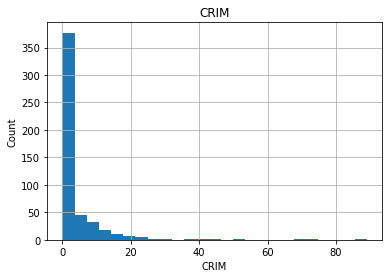

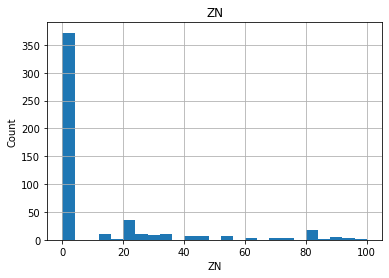

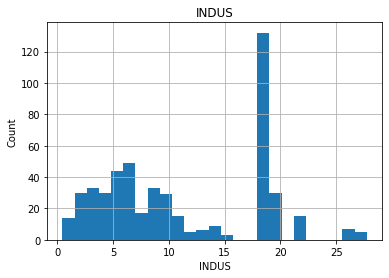

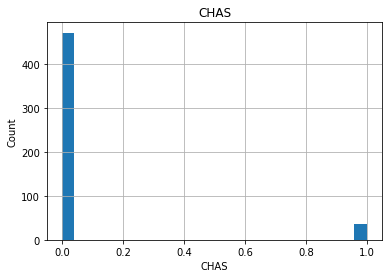

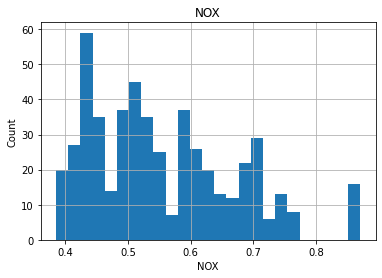

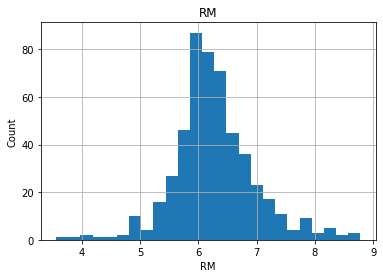

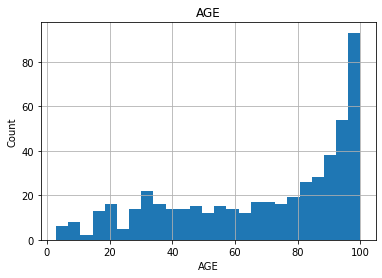

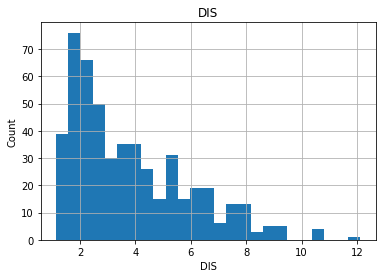

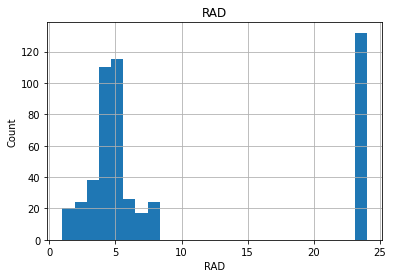

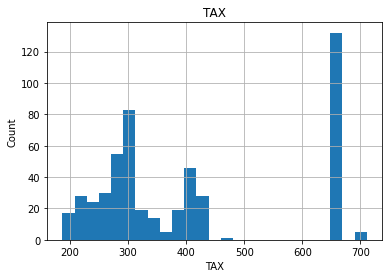

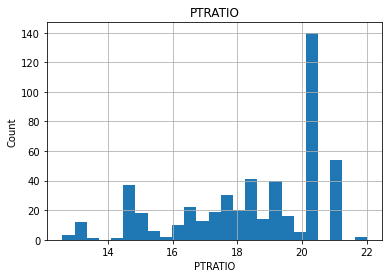

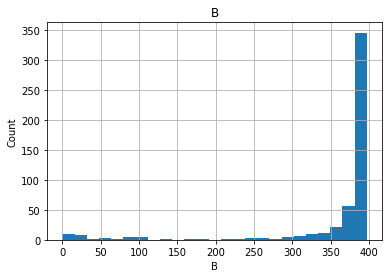

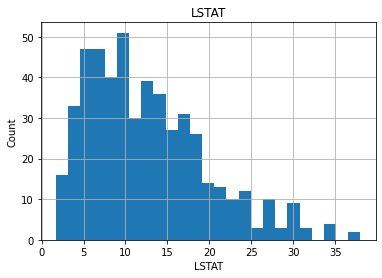

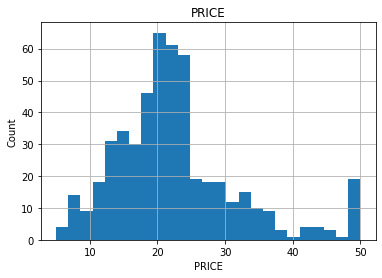

In [11]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in bos.columns:
    data=bos.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Clearly seen as feature 3 is a categorical bariable having value  0 and 1, we have already saw there is no missing values hence we have to chek for any outliers as well as do any transformation for making the data more normal distributed



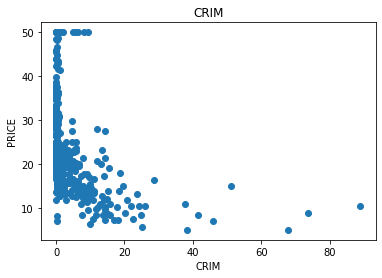

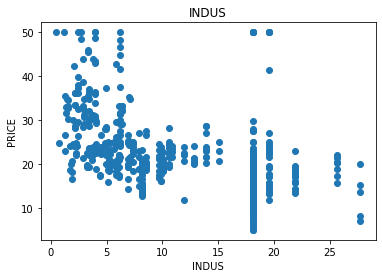

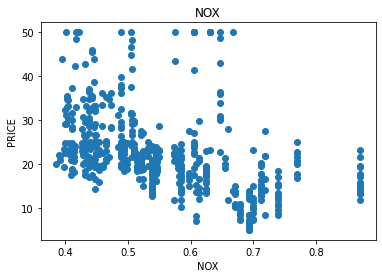

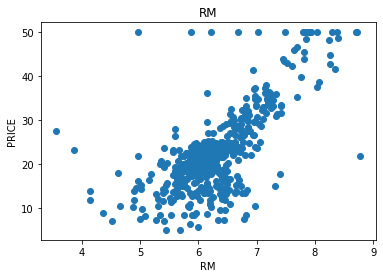

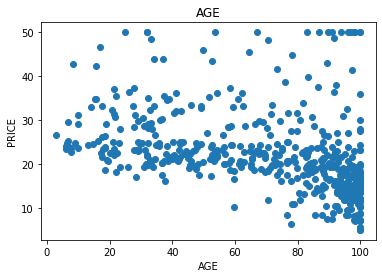

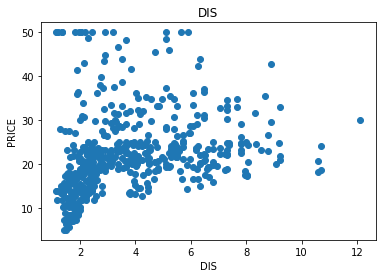

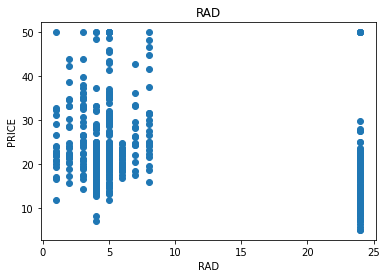

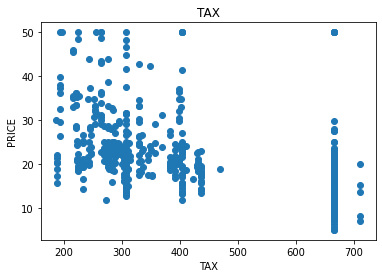

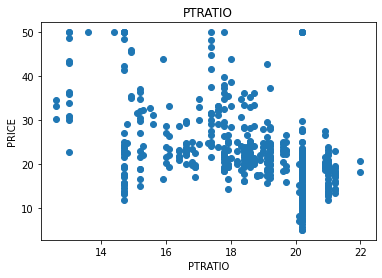

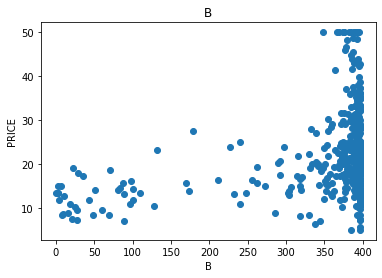

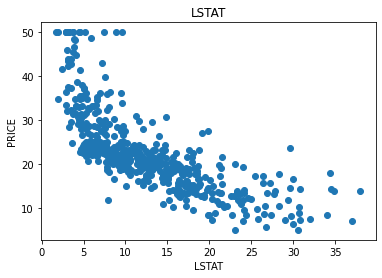

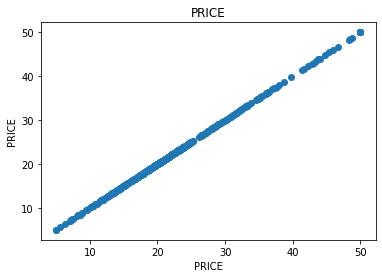

In [12]:
## Plotting scatter plots wrt to price with different features


for feature in bos.columns:
    data=bos.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.scatter(data[feature],data['PRICE'])
        plt.xlabel(feature)
        plt.ylabel('PRICE')
        plt.title(feature)
        plt.show()
        

<AxesSubplot:>

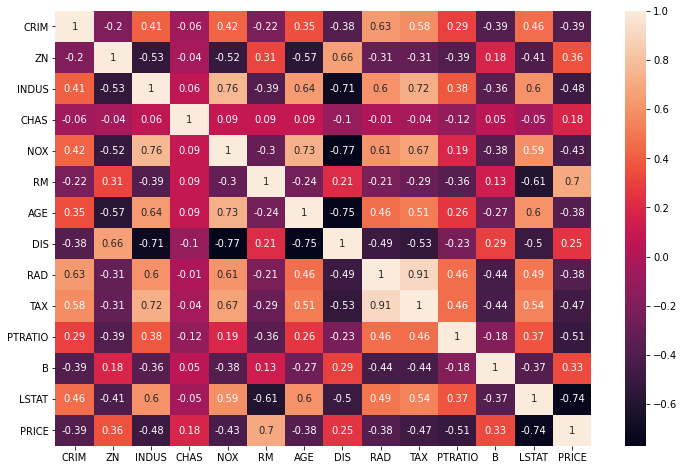

In [17]:
## checking correlations
correlation_matrix = bos.copy().corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation_matrix, annot=True)

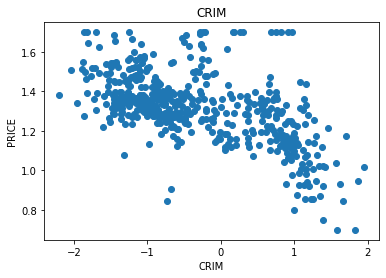

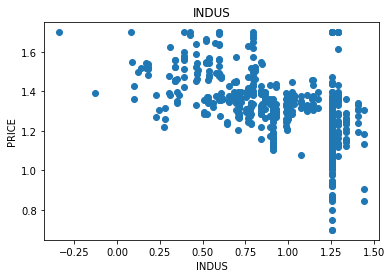

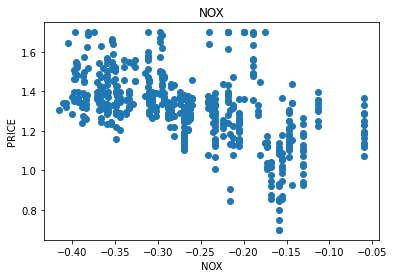

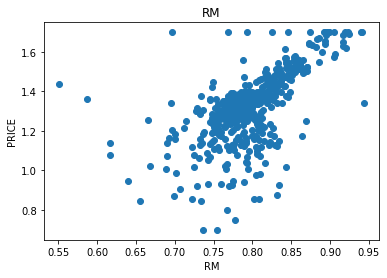

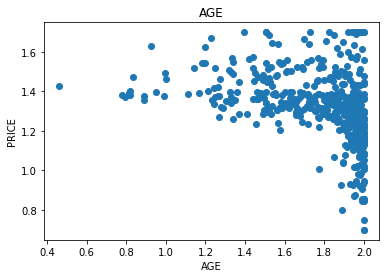

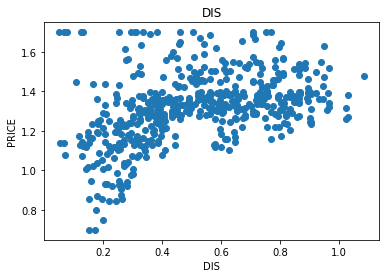

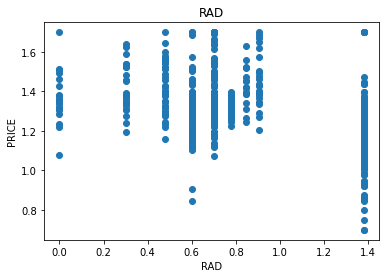

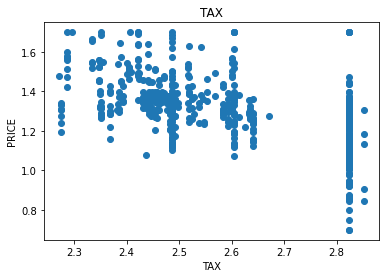

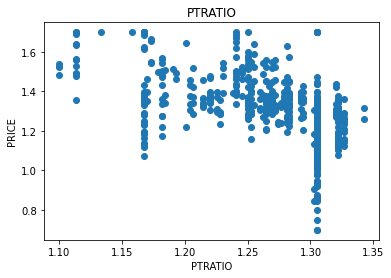

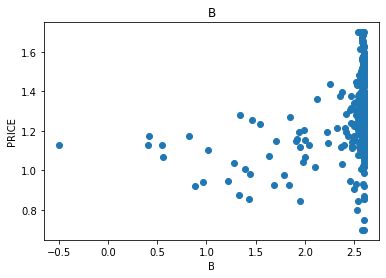

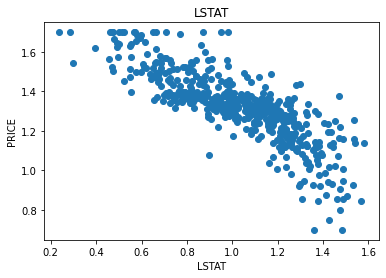

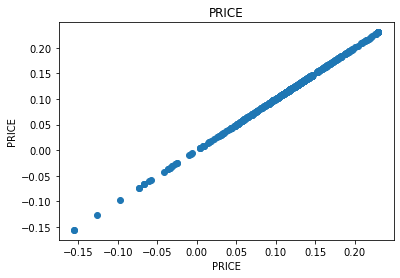

In [20]:
## Plotting scatter plots wrt to price with logtransformingdifferent features


for feature in bos.columns:
    data=bos.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] =np.log10(data[feature])
        data['PRICE'] =np.log10(data['PRICE'])
        plt.scatter(data[feature],data['PRICE'])
        plt.xlabel(feature)
        plt.ylabel('PRICE')
        plt.title(feature)
        plt.show()
        

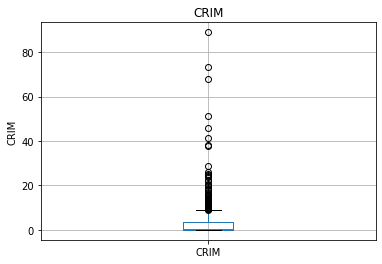

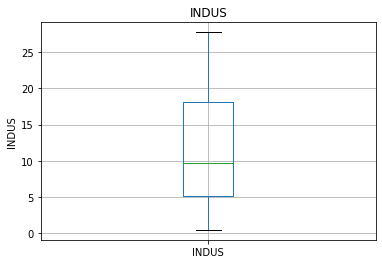

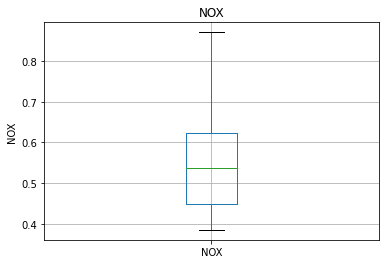

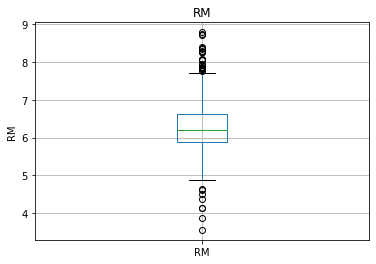

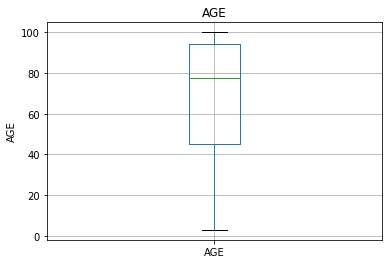

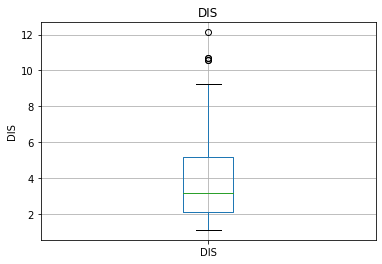

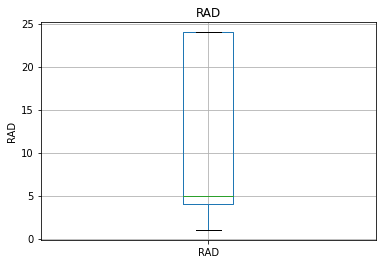

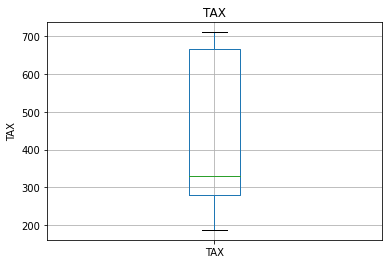

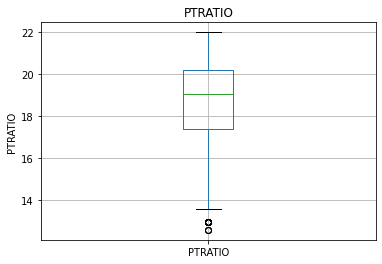

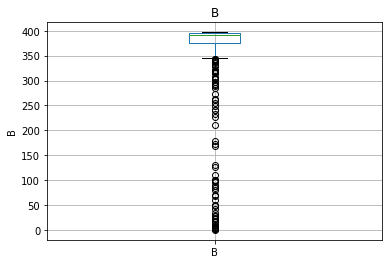

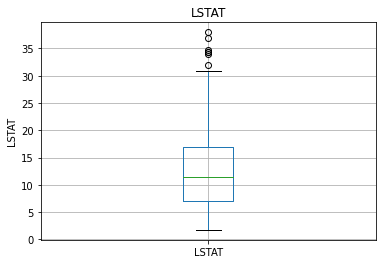

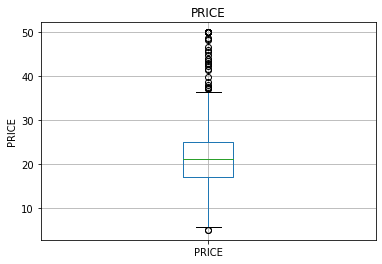

In [23]:
### Detecting Outliers
for feature in bos.columns:
    data=bos.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=data[feature]
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [38]:
### Given that CRIM, RM, B, PRICE has significant outliers.
### Removing outliers using IQR methods
Q1 = bos.quantile(0.25)
Q3 = bos.quantile(0.75)
IQR = Q3 - Q1

bos_filter_IQR = bos[~((bos< (Q1 - 10* IQR)) |(bos> (Q3 + 10* IQR))).any(axis=1)]

In [39]:
bos.shape

(506, 14)

In [40]:
bos_filter_IQR.shape

(433, 14)

### Model building & Performance

#### Without removing outliers

In [42]:
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.3024990057520744
R2 score is 0.75




#### After removing Outliers

In [44]:
X = bos_filter_IQR.drop('PRICE', axis = 1)
y = bos_filter_IQR['PRICE']

X_iqr_train, X_iqr_test, y_iqr_train, y__iqr_test = train_test_split(X,y,test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_iqr_train, y_iqr_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_iqr_train)
rmse = (np.sqrt(mean_squared_error(y_iqr_train, y_train_predict)))
r2 = round(reg_all.score(X_iqr_train, y_iqr_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.3024990057520744
R2 score is 0.75




In [45]:
### After standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Standardize weight
X_iqr_train = scaler.fit_transform(X_iqr_train)


In [46]:
X_iqr_train

array([[-0.40075264, -0.53626152,  1.66320658, ...,  1.28514535,
         0.2796376 ,  0.45614996],
       [ 1.28699024, -0.53626152,  1.12089401, ...,  0.83412568,
         0.51390473,  0.47689943],
       [-0.19272136, -0.53626152, -0.30428626, ...,  1.19494142,
        -0.0616334 ,  0.16121105],
       ...,
       [-0.45641101,  2.33438807, -1.14851955, ..., -1.60138053,
        -0.20858538, -1.06893615],
       [ 4.11899655, -0.53626152,  1.12089401, ...,  0.83412568,
         0.51390473,  2.96980013],
       [-0.42474657, -0.53626152, -0.2441883 , ...,  1.14983945,
         0.44456622,  0.22049525]])

In [48]:
y_iqr_train

133    18.4
393    13.8
31     14.5
84     23.9
326    23.0
       ... 
71     21.7
107    20.4
299    29.0
387     7.4
103    19.3
Name: PRICE, Length: 346, dtype: float64

In [47]:
reg_all = LinearRegression()
reg_all.fit(X_iqr_train, y_iqr_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_iqr_train)
rmse = (np.sqrt(mean_squared_error(y_iqr_train, y_train_predict)))
r2 = round(reg_all.score(X_iqr_train, y_iqr_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set
--------------------------------------
RMSE is 4.3024990057520744
R2 score is 0.75




#### Performance on Testing set

In [49]:
X_iqr_test = scaler.transform(X_iqr_test)

In [52]:
y_test_predict = reg_all.predict(X_iqr_test)
rmse = (np.sqrt(mean_squared_error(y__iqr_test, y_test_predict)))
r2 = round(reg_all.score(X_iqr_test, y__iqr_test),2)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for testing set
--------------------------------------
RMSE is 4.312573757175988
R2 score is 0.73


